## Section 1: Business understanding

As Airbnb business and home owners we would like to understand what are the key factors that are affecting property prices, analyse what features can be used to predict pricing. This information might be helpful for all parties of AirBNB renting process and at the end increase profit. Given that this topic is quite complex and may contain wide range of questions, for Udacity research purposes it was decided to limit the topic to 3 questions:
#### Question 1: Are there seasonal differences in pricing?
#### Question 2: Do reviews and cancellation policy impact prices?
#### Question 3: Can information from reviews and house descriptions be useful in predicting pricing groups? What features can be used to predict pricing groups.

## Section 2: Data Understanding

#### Gather

In [1]:
import pandas, numpy, seaborn
from matplotlib import pyplot
%matplotlib inline 

calendar = pandas.read_csv('seattle_dataset/calendar.csv')
listings = pandas.read_csv('seattle_dataset/listings.csv')
reviews = pandas.read_csv('seattle_dataset/reviews.csv')

#### Access and explore

In [10]:
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [3]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
64604,173896,2412443,2012-09-25,516671,Joyce,The studio is a cozy place to land in the hear...
44960,1851863,8947510,2013-11-27,9728153,Nick,The apartment was exactly as described: simple...
6862,699596,21539555,2014-10-19,8919293,Anne-Laure,Great stay! Megan and Saul's place is ideal to...
17813,8847108,56510975,2015-12-14,39815358,Brooke,We had a blast! The location was ideal and the...
24966,1956274,12784411,2014-05-11,1673320,Anthony,My wife and I recently visited our daughter an...


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Section 3: Data Preparation

Clean N/A price values. Since we are validating dependency of price values on the seasonality, it is necessary to drop N/A values. It is not possible to replace N/A values with 0 because it will affect data analysis outcome.

In [ ]:
calendar = calendar.dropna(subset=['price'])

## Section 4: Evaluate results

### Question 1: is there seasonal differences in pricing?

- assign dates to seasons
- retrieve available prices
- plot distributions of prices for seasons

In [525]:
# keep entries with available prices

""" Since we are validating dependency of price values on the seasonality, it is necessary to drop N/A
values. It is not possible to replace N/A values with 0 because it will affect data analysis outcome.
"""
calendar = calendar.dropna(subset=['price'])

# parse numbers
price_numbers = []
for price in calendar['price']:
    price_numbers.append(float(price.replace('$', '').replace(',', '')))
calendar['price'] = price_numbers
                         
# assign seasons
seasons = []
for date in calendar['date']:
    if '-12-' in date or '-01-' in date or '-02-' in date:
        seasons.append('winter')
    elif '-03-' in date or '-04-' in date or '-05-' in date:
        seasons.append('spring')
    elif '-06-' in date or '-07-' in date or '-08-' in date:
        seasons.append('summer')
    else:
        seasons.append('autumn')
calendar['season'] = seasons

' Although the distributions overlay largely, we still can spot the trend:\n    - those listings of low price get even cheaper in summer (to compete for clients) and more expensive in autumn andd winter (to earn money),\n    - those listings of high prices get even more expensive in summer (to earn money) and cheaper in other seasons (to keep the clients)\n'

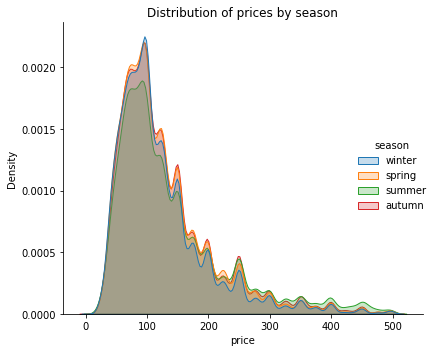

In [547]:
# plot distributions
calendar_500 = calendar[calendar['price'] < 500]
seaborn.displot(calendar_500, x="price", hue="season", kind="kde", fill=True)
pyplot.title("Distribution of prices by season")
pyplot.tight_layout()
pyplot.savefig('distribution.png', dpi=200)

Although the distributions overlay largely, we still can spot the trend:
    - those listings of low price get even cheaper in summer (to compete for clients) and more expensive in autumn andd winter (to earn money),
    - those listings of high prices get even more expensive in summer (to earn money) and cheaper in other seasons (to keep the clients)

### Question 2: is there any connection between the following features and the pricing: number of reviews, review scores and cancellation policy?

- retrieve corresponding features for listings
- correlate them with pricing
- plot the results

In [528]:
from tqdm import tqdm

reviews_per_month = []
review_scores_value = []
cancellation_policy = []
# collect three features
for lid in tqdm(calendar['listing_id']):
    entry = listings.loc[listings['id'] == lid, :]    
    reviews_per_month.append(float(entry['reviews_per_month']))
    review_scores_value.append(float(entry['review_scores_value']))
    cancellation_policy.append(str(entry['cancellation_policy'].values[0]))
    
calendar['reviews_per_month'] = reviews_per_month
calendar['review_scores_value'] = review_scores_value    
calendar['cancellation_policy'] = cancellation_policy

100%|█████████████████████████████████| 934542/934542 [08:07<00:00, 1916.02it/s]


In [529]:
from scipy.stats import spearmanr

# dropna
reviews_per_month = calendar.dropna(subset=['reviews_per_month'])
review_scores_value = calendar.dropna(subset=['review_scores_value'])

# check pearson correlations for continuous variables
review_r, reviews_p = spearmanr(reviews_per_month['reviews_per_month'], reviews_per_month['price'])
scores_r, scores_p = spearmanr(review_scores_value['review_scores_value'], review_scores_value['price'])

print('correlation between price and review_per_month:\nr = {}, p-value = {}\n'.format(review_r, reviews_p))
print('correlation between price and review_scores_value:\nr = {}, p-value = {}'.format(scores_r, scores_p))

correlation between price and review_per_month:
r = -0.21387359558193364, p-value = 0.0

correlation between price and review_scores_value:
r = -0.07135172032978417, p-value = 0.0


Above we see strong negative correlation between price and review_per_month.

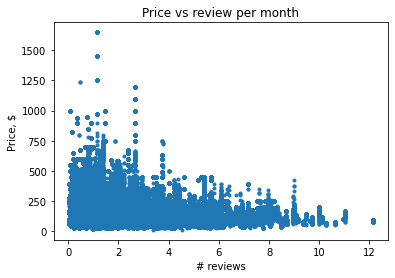

In [530]:
pyplot.plot(reviews_per_month['reviews_per_month'], reviews_per_month['price'], '.')
pyplot.title("Price vs review per month")
pyplot.xlabel('# reviews')
pyplot.ylabel('Price, $')
pyplot.savefig('correlation.png', dpi=200)

There is a dependency between the two variables, as seen on the plot.

In [531]:
policy = calendar.dropna(subset=['cancellation_policy'])

# calculate continjency table of dependency between cancellation policy and level of pricing
contingency = pandas.DataFrame({
    'low': [
        (policy.loc[policy['price'] < 200, 'cancellation_policy'] == 'strict').sum(),
        (policy.loc[policy['price'] < 200, 'cancellation_policy'] == 'moderate').sum(),
        (policy.loc[policy['price'] < 200, 'cancellation_policy'] == 'flexible').sum()
    ],
    'medium': [
        (policy.loc[(policy['price'] >= 200) & (policy['price'] < 500), 'cancellation_policy'] == 'strict').sum(),
        (policy.loc[(policy['price'] >= 200) & (policy['price'] < 500), 'cancellation_policy'] == 'moderate').sum(),
        (policy.loc[(policy['price'] >= 200) & (policy['price'] < 500), 'cancellation_policy'] == 'flexible').sum()
    ],
    'high': [
        (policy.loc[policy['price'] >= 500, 'cancellation_policy'] == 'strict').sum(),
        (policy.loc[policy['price'] >= 500, 'cancellation_policy'] == 'moderate').sum(),
        (policy.loc[policy['price'] >= 500, 'cancellation_policy'] == 'flexible').sum()
    ]
}, index = ['strict', 'moderate', 'flexible'])

contingency

,low,medium,high
strict,254992,94678,9734
moderate,268939,29693,1183
flexible,250113,22572,2638


In [532]:
from scipy.stats import chi2_contingency

# check chi-square for cancellation policy
chi2, p, dof, ex = chi2_contingency(contingency)
print('cancellation policy and pricing are not independent with p-value = {}'.format(p))

cancellation policy and pricing are not independent with p-value = 0.0


After conducting above analysis we came to the conclusion that yes, indeed, policy does have impact on prices. After performing statistical tests, the chi-squared formally confirmed that the variables in the table are not independent.

### Question 3: is it possible to predict pricing groups using only a few listing features? What features can be used to predict pricing groups.

- bin the pricing into groups and assign labels
- prepare features for classification
- train a model
- evalute predictions

In [534]:
def parse_description(text):
    """
    Converts description of a listing into a dict of binary features
    (whether a particular information is given or not).
    
    :param text: string
    :return: info: dict of binary features
    """
    info = {        
        # mentioned or not
        'internet': False,
        'transport': False,
        'central': False,
        'new': False,
        'view': False,
        'parking': False,
        'green': False,
        'terrace': False,
        'quiet' : False,
        'pets': False,
        'cafes': False,
        'shops': False,
        'neighbors': False
    }
    
    for word in text.split():
        
        word = word.replace(',', '').replace('.', '').replace('!','').replace(':','').replace(';', '').strip()
        
        if word.lower() in ['internet', 'wifi', 'wi-fi']:
            info['internet'] = True
        
        if word.lower() in ['bus', 'tram', 'buses', 'trams']:
            info['transport'] = True
        
        if word.lower() in ['centre', 'center', 'central', 'downtown']:
            info['central'] = True
        
        if word.lower() in ['new', 'brand new', 'brand-new', '2010', '2011', '2012', '2013', '2014', '2015', '2016']:
            info['new'] = True
        
        if word.lower() in ['view', 'views']:
            info['view'] = True
            
        if word.lower() in ['parking', 'parkings', 'garage', 'auto', 'car', 'cars']:
            info['parking'] = True
        
        if word.lower() in ['garden', 'gardens', 'park', 'parks', 'green', 'lawn']:
            info['green'] = True
        
        if word.lower() in ['terrace', 'yard', 'balcony', 'veranda', 'porch', 'stoop']:
            info['terrace'] = True
        
        if word.lower() in ['quiet', 'still', 'relaxed', 'peaceful', 'calmful']:
            info['quiet'] = True
        
        if word.lower() in ['pets', 'pet', 'dogs', 'dog', 'cats', 'cat', 'domestic animal']:
            info['pets'] = True
        
        if word.lower() in ['restaurant', 'restaurants', 'cafe', 'cafes', 'coffee', 'bistro', 'pub', 'pubs', 'bar', 'bars']:
            info['cafes'] = True
        
        if word.lower() in ['market', 'markets', 'shop', 'shops']:
            info['shops'] = True
        
        if word.lower() in ['neighbor', 'neighbors']:
            info['neighbors'] = True
        
    return info


def parse_review(text):
    """
    Converts a review of a listings into a dict of continuous features (calculates positive or negative feedback.)
    
    :param text: string
    :return: feedback: a dict of features
    """

    feedback = {        
        'positive': 0,  # how many positive words
        'norm_positive': 0,  # how many positive words / number of words
        'negative': 0,
        'norm_negative': 0
    }
    
    if isinstance(text, float):
        pass
    else:
        
        text = text.replace(',', '').replace('.', '').replace('!','').replace(':','').replace(';', '').strip().lower()
        if len(text.split()) == 0:
            pass
        else:
        
            adjectives = [' cute ', ' cozy ', ' perfect ', ' great ', ' wow ', ' spacious ', ' warm ', ' welcoming ',
                          ' interesting ', ' accommodating ', ' pleasant ', ' good ', ' clean ', ' well ', ' nice ',
                          ' comfortable ', ' quiet ', ' easy ', ' practical ', ' reachable ', ' flexible ', ' fancy ',
                          ' recommended ', ' responsive ', ' dirty ', ' helpful ', ' ideal ', ' well-furnished ',
                          ' lovely ', ' friendly ', ' convenient ', ' prompt ', ' relaxing ', ' consistent ',
                          ' obliging ', ' communicative ', ' super ', ' gracious ', ' decorated ', ' dusty ', 
                          ' recommend ', ' safe ', ' cuddly ',  ' cool ', ' tidy ', ' hospitable ', ' kind ',
                          ' understanding ', ' easygoing ']

            nouns = [' downside ', ' downsides ', ' issue ', ' issues ', ' troubles ', ' trouble ',
                     ' problem ', ' problems ', ' worries ', ' complaint ', ' complaints ', ' dirt ', ' dust ']

            positive_keywords = [' beautiful ', ' coolest ', ' fantastic ', ' wonderful ', ' amazing ', ' delightful ',
                                ' charming ', ' awesome ', ' adorable ', ' phenomenal ', ' excellent ', ' sweetest ',
                                 ' terrific ', ' flawless ', ' inspiring ', ' sweet ', ' dreamy ', ' lovable ',
                                 ' amusing ', ' pleasurable ']

            negative_keywords = [' negative ', ' no ', ' cold ', ' loud ', ' uncomfortable ', ' noisy ', ' noise ',
                                 ' noises ', ' broken ', ' inconvenient ', ' trash ', ' weak ', ' small ',
                                 ' inconvenience ', ' drawback ', ' drawbacks ', ' flaw ', ' flaws ', ' frustrated ',
                                 ' frustration ', ' disappointed ', ' disappointment ']

            for word in adjectives:
                # can be positive or negative
                count = text.count(word)
                count_not = text.count(' not' + word)
                count_not += text.count(' too' + word)
                count_not += text.count(' not so' + word)
                count_not += text.count(' not very' + word)
                count_not += text.count(' not quite' + word)
                count_not += text.count(' never' + word)

                feedback['negative'] += count_not
                feedback['positive'] += count - count_not

            for word in nouns:
                # can be negative or positive
                count = text.count(word)
                count_not = text.count(' not a' + word)
                count_not += text.count(' never a' + word)        
                count_not += text.count(' no' + word)
                count_not += text.count(' any' + word)
                count_not += text.count(' isn\'t a' + word)
                count_not += text.count(' wasn\'t a' + word)

                feedback['negative'] += count - count_not
                feedback['positive'] += count_not

            for word in positive_keywords:
                # can be only positive
                count = text.count(word)
                feedback['positive'] += count

            for word in negative_keywords:
                # can be only negative
                count = text.count(word)
                feedback['negative'] += count

            # normalize by number of words
            feedback['norm_positive'] += feedback['positive'] / len(text.split())
            feedback['norm_negative'] += feedback['negative'] / len(text.split())

    return feedback

In [535]:
from datetime import datetime

data = calendar.copy()

# preprocess dates
weekends = []
holidays = []
nearly_holidays = ['2016-01-01', '2016-01-02', '2016-01-17', '2016-01-18', '2016-01-19', '2016-02-14',
                     '2016-02-15', '2016-02-16', '2016-05-29', '2016-05-30', '2016-05-31', '2016-07-04',
                     '2016-07-05', '2016-09-05', '2016-09-06', '2016-11-10', '2016-11-11', '2016-11-12',
                     '2016-11-24', '2016-11-25', '2016-11-26', '2016-12-22', '2016-12-23', '2016-12-24',
                     '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-31']

for date in data['date']:
    
    if str(date) in nearly_holidays:
        holidays.append(True)
    else:
        holidays.append(False)
    
    if datetime(*[int(x) for x in str(date).split('-')]).weekday() >= 4:
        weekends.append(True)
    else:
        weekends.append(False)

data['weekends'] = weekends
data['holidays'] = holidays

# drop redundant columns from calender
data = data.drop(columns=['available', 'date'])

# add informative features from listings
for i in range(listings['id'].values.shape[0]):
    data.loc[data['listing_id'] == listings['id'].values[i], 'review_scores_value'] = listings['review_scores_value'].values[i]
    data.loc[data['listing_id'] == listings['id'].values[i], 'instant_bookable'] = listings['instant_bookable'].values[i]
    data.loc[data['listing_id'] == listings['id'].values[i], 'cancellation_policy'] = listings['cancellation_policy'].values[i]
    data.loc[data['listing_id'] == listings['id'].values[i], 'calculated_host_listings_count'] = listings['calculated_host_listings_count'].values[i]
    data.loc[data['listing_id'] == listings['id'].values[i], 'reviews_per_month'] = listings['reviews_per_month'].values[i]

In [536]:
# drop duplicates
data = data.drop_duplicates()

In [537]:
# parse descriptions
desc_features = []
for description in tqdm(listings['description']):
    info = parse_description(description)
    desc_features.append([value for key, value in info.items()])

desc_features = pandas.DataFrame(desc_features, columns=[key for key, value in info.items()])
desc_features['listing_id'] = listings['id']

# merge with previous features
data = data.merge(desc_features, how='inner', on='listing_id')

100%|█████████████████████████████████████| 3818/3818 [00:01<00:00, 2773.96it/s]


In [538]:
# parse reviews
rev_features = []
for review in tqdm(reviews['comments']):
    info = parse_review(review)
    rev_features.append([value for key, value in info.items()])

rev_features = pandas.DataFrame(rev_features, columns=[key for key, value in info.items()])
rev_features['listing_id'] = reviews['listing_id']

# average features of the same listings
rev_features = rev_features.groupby(['listing_id']).mean()
rev_features.reset_index(level=0, inplace=True)

# merge with previous features
data = data.merge(rev_features, how='inner', on='listing_id')

100%|███████████████████████████████████| 84849/84849 [00:18<00:00, 4486.04it/s]


In [539]:
# encode price to have 50/50 dataset
data.loc[data['price'] < 125, 'price'] = 0
data.loc[data['price'] >= 125, 'price'] = 1

# drop listring id
data = data.drop(['listing_id'], axis=1)

# shuffle
data = data.sample(frac=1.)

In [540]:
# encode features
data = pandas.get_dummies(data)
# drop nas and convert to floats
data = data.dropna().astype('float')

# split data
X_train = data.iloc[:int(0.8 * data.shape[0]), 1:]
X_test = data.iloc[int(0.8 * data.shape[0]):, 1:]
y_train = data.iloc[:int(0.8 * data.shape[0]), 0]
y_test = data.iloc[int(0.8 * data.shape[0]):, 0]

In [542]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

model = GradientBoostingClassifier()
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.15, 0.2], 'n_estimators': [100, 200]}
grid = GridSearchCV(model, parameters, scoring='accuracy', verbose=3)

start = time.time()
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.719 total time=   5.5s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.710 total time=   5.4s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.715 total time=   5.3s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.704 total time=   5.3s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.717 total time=   5.4s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.746 total time=  10.8s
[CV 2/5] END learning_rate=0.01, n_estimators=200;, score=0.739 total time=  10.7s
[CV 3/5] END learning_rate=0.01, n_estimators=200;, score=0.742 total time=  10.7s
[CV 4/5] END learning_rate=0.01, n_estimators=200;, score=0.731 total time=  10.7s
[CV 5/5] END learning_rate=0.01, n_estimators=200;, score=0.742 total time=  11.0s
[CV 1/5] END learning_rate=0.03, n_estimators=100;, score=0.754 total time=   5.5s
[CV 2/5] END learning_rate

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [543]:
results = pandas.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.378430,0.071659,0.029611,0.002209,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.718659,0.709808,0.714924,0.704044,0.716548,0.712796,0.005263,16
1,10.726890,0.108790,0.051398,0.000444,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.745534,0.738551,0.742368,0.731406,0.741799,0.739932,0.004804,15
2,5.515462,0.058236,0.028676,0.002982,0.03,100,"{'learning_rate': 0.03, 'n_estimators': 100}",0.753897,0.750406,0.752030,0.744804,0.748538,0.749935,0.003117,14
3,11.069358,0.352552,0.046392,0.001048,0.03,200,"{'learning_rate': 0.03, 'n_estimators': 200}",0.769081,0.764940,0.765752,0.764534,0.769324,0.766726,0.002061,12
4,5.442648,0.057890,0.025866,0.000301,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.763478,0.760880,0.760718,0.760312,0.759662,0.761010,0.001304,13
5,10.907291,0.046297,0.043174,0.000389,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",0.785888,0.783128,0.784589,0.777200,0.788974,0.783956,0.003889,8
6,5.459242,0.024287,0.024796,0.000177,0.07,100,"{'learning_rate': 0.07, 'n_estimators': 100}",0.775252,0.768837,0.772410,0.770055,0.775089,0.772329,0.002590,11
7,10.829615,0.047671,0.040618,0.000474,0.07,200,"{'learning_rate': 0.07, 'n_estimators': 200}",0.800909,0.793602,0.797093,0.792140,0.801559,0.797061,0.003774,7
8,5.440043,0.052126,0.024296,0.000878,0.09,100,"{'learning_rate': 0.09, 'n_estimators': 100}",0.781585,0.779149,0.781341,0.776470,0.785888,0.780887,0.003106,10
9,11.022537,0.177885,0.039451,0.000622,0.09,200,"{'learning_rate': 0.09, 'n_estimators': 200}",0.807243,0.800909,0.807567,0.801803,0.808461,0.805196,0.003174,5


In [544]:
# get best model
best_model = grid.best_estimator_

# predict
preds_train = best_model.predict(X_train)
preds_test = best_model.predict(X_test)

# calculate accuracy
train_acc = accuracy_score(y_train, preds_train)
test_acc = accuracy_score(y_test, preds_test)

print('Prediction of prices')
print('train accuracy:', round(train_acc, 2))
print('test accuracy:', round(test_acc, 2))

Prediction of prices
train accuracy: 0.85
test accuracy: 0.85


In [548]:
# retrieve feature importances
importances = [(x,y) for x, y in zip(list(X_train.columns), list(best_model.feature_importances_))]

n = 0
print('Top 15 most important features:\n')
for f in reversed(sorted(importances, key=lambda x: x[1])):
    print('%.3f: {}'.format(f[0]) % f[1])
    n += 1
    if n == 15:
        break

Top 15 most important features:

0.201: cancellation_policy_strict
0.170: reviews_per_month
0.129: calculated_host_listings_count
0.086: positive
0.076: norm_positive
0.052: norm_negative
0.045: negative
0.031: shops
0.030: transport
0.026: view
0.022: season_winter
0.017: review_scores_value
0.016: cancellation_policy_flexible
0.016: internet
0.014: pets


After performing semantic text analysis in combination with gradient boosting, we defined list of top 15 features that have most significant impact on pricing that is available above. To answer the question, yes we can predict prices by using most important features. 